# Medical Insurance Prediction System

## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Reading CSV File of Medical Insurance

In [2]:
df=pd.read_csv('insurance (2).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking for Null Values

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Density plot graph 

<AxesSubplot:ylabel='Density'>

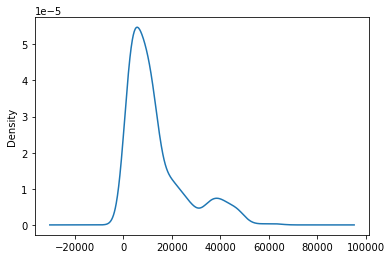

In [4]:
df['charges'].plot.kde()

## Box plot Charges vs Smoker

<AxesSubplot:xlabel='smoker', ylabel='charges'>

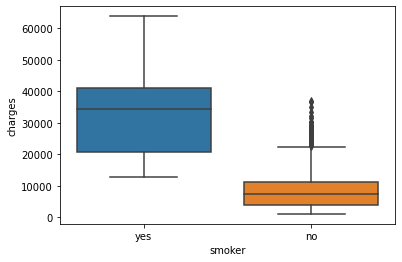

In [5]:
sns.boxplot(x=df['smoker'],y=df['charges'])

## Box plot Charges vs Region

<AxesSubplot:xlabel='region', ylabel='charges'>

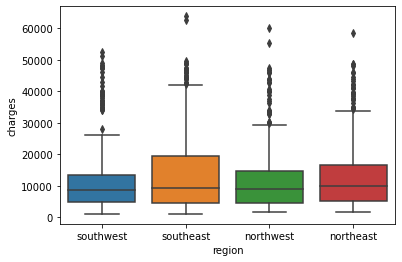

In [6]:
sns.boxplot(x=df['region'],y=df['charges'])

## Box plot Charges vs Region

<AxesSubplot:xlabel='children', ylabel='charges'>

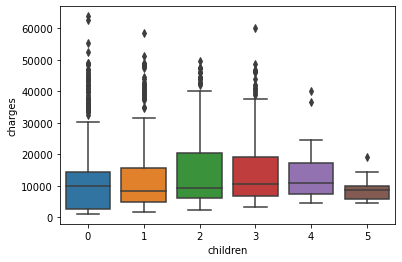

In [7]:
sns.boxplot(x=df['children'],y=df['charges'])


## Mean cost analysys:

Mean cost analysys:


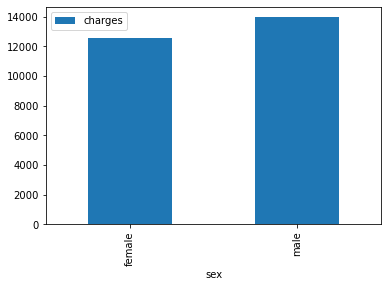

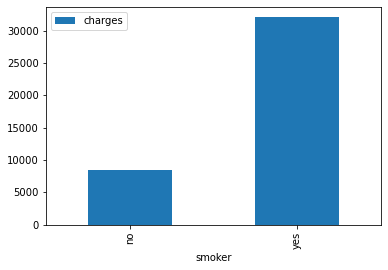

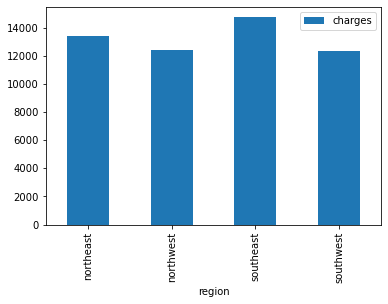

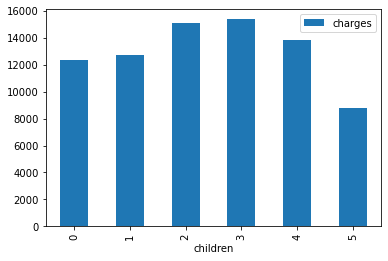

In [8]:
variables = ['sex','smoker','region','children']
print('Mean cost analysys:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

## Data distribution analysys

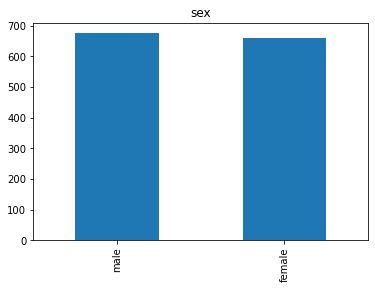

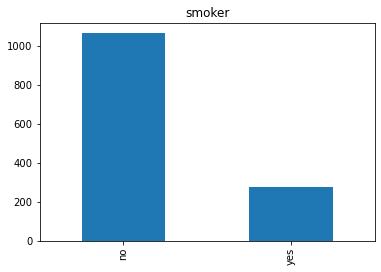

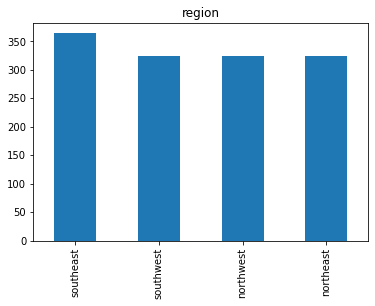

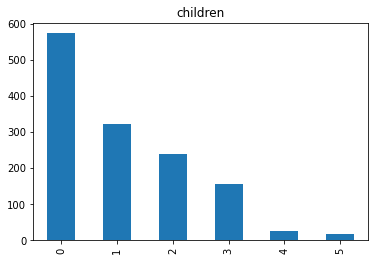

In [9]:
for x in variables:
    df[x].value_counts().sort_values(ascending=False).plot(kind = 'bar')
    plt.title(x)
    plt.show()

## Data pre-processing

## Importing Label Encoder 

In [10]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()

In [11]:
df.sex=number.fit_transform(df.sex)
df.smoker=number.fit_transform(df.smoker)
df.region=number.fit_transform(df.region)

## Spliting Data into X and y

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


## Spliting into Train and Test sets

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
y_test

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

## Training Multiple Linear regression on training set

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [15]:
y_pred=model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 1.10e+04  9.72e+03]
 [ 9.79e+03  8.55e+03]
 [ 3.80e+04  4.57e+04]
 [ 1.61e+04  1.30e+04]
 [ 6.93e+03  9.64e+03]
 [ 3.97e+03  4.50e+03]
 [ 1.55e+03  2.20e+03]
 [ 1.43e+04  1.14e+04]
 [ 8.95e+03  7.54e+03]
 [ 7.43e+03  5.43e+03]
 [ 4.54e+03  6.75e+03]
 [ 1.02e+04  1.05e+04]
 [ 8.66e+03  7.34e+03]
 [ 4.13e+03  4.19e+03]
 [ 2.78e+04  1.83e+04]
 [ 1.10e+04  1.07e+04]
 [ 1.13e+04  1.25e+04]
 [ 6.03e+03  3.49e+03]
 [ 8.17e+03  6.46e+03]
 [ 2.70e+04  3.35e+04]
 [ 3.36e+04  2.40e+04]
 [ 1.43e+04  1.26e+04]
 [ 1.17e+04  2.30e+04]
 [ 3.24e+04  2.31e+04]
 [ 4.41e+03  1.67e+03]
 [ 9.15e+03  4.67e+03]
 [ 1.13e+03  3.73e+03]
 [ 1.01e+04  7.68e+03]
 [ 4.09e+03  3.76e+03]
 [ 1.04e+04  8.41e+03]
 [ 8.96e+03  8.06e+03]
 [ 4.02e+04  4.90e+04]
 [ 1.55e+04  1.30e+04]
 [ 1.37e+04  2.06e+04]
 [ 2.47e+04  1.46e+04]
 [ 5.13e+03  4.14e+03]
 [ 1.28e+04  8.35e+03]
 [ 3.05e+04  5.12e+04]
 [ 3.34e+04  4.00e+04]
 [ 3.49e+03  1.88e+03]
 [ 4.00e+03  5.46e+03]
 [ 4.28e+03  2.87e+03]
 [ 3.05e+04  2.01e+04]
 [ 3.93e+04

## Prediction

In [16]:
age=int(input('Enter Age='))
print('---------------------')

print('Sex:\n Enter 1 for Male \n Enter 0 for Female')

sex=int(input('Enter your Sex='))
print('---------------------')



bmi=float(input('Enter your Body Mass Index= '))
print('---------------------')

children=int(input('Enter number of Children= '))
print('---------------------')

print('Smoker:\n Enter 1 for Smoker\n Enter 0 for Non-Smoker')
smoker=int(input('Are you smoker or not?='))

print('---------------------')
print('Region:\n Enter 1 for northwest \n Enter 2 for southeast\n Enter 3 for southwest\n Enter 4 for northeast ')
region=int(input('Enter your region= '))
print('---------------------')

print(f"Estimateprice of Insurance is ${model.predict([[age,sex,bmi,children,smoker,region]])}")

Enter Age=32
---------------------
Sex:
 Enter 1 for Male 
 Enter 0 for Female
Enter your Sex=1
---------------------
Enter your Body Mass Index= 29
---------------------
Enter number of Children= 2
---------------------
Smoker:
 Enter 1 for Smoker
 Enter 0 for Non-Smoker
Are you smoker or not?=0
---------------------
Region:
 Enter 1 for northwest 
 Enter 2 for southeast
 Enter 3 for southwest
 Enter 4 for northeast 
Enter your region= 3
---------------------
Estimateprice of Insurance is $[5987.04]


## Accuracy/MAE/R2 score

In [17]:
from sklearn import metrics
print("MAE= ",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE= ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 score=",metrics.r2_score(y_test,y_pred))

MAE=  3930.3332739011444
RMSE=  5643.219748880902
R2 score= 0.7998747145449959
